In [4]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)

In [5]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [6]:
print(f"x.shape: {X_train.shape}, type: {type(X_train)}")
print(X_train)
print(f"y.shape: {y_train.shape}, type: {type(y_train)}")
print(y_train)

x.shape: (3, 4), type: <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y.shape: (3,), type: <class 'numpy.ndarray'>
[460 232 178]


In [7]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [8]:
def predict_single_loop(x, w, b):
    """Single predict using linear regression"""
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [9]:
x_vec = X_train[0, :]
print(f"x_vec shape: {x_vec.shape}, value: {x_vec}")

# predict
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")

x_vec shape: (4,), value: [2104    5    1   45]
f_wb shape: (), prediction: 459.9999976194083


In [10]:
def predict(x, w, b):
    """single predict using LS"""
    p = np.dot(x, w) + b
    return p

In [11]:
x_vec = X_train[0, :]
f_wb = predict(x_vec, w_init, b_init)
print('predicted: ', f_wb)

predicted:  459.9999976194083


# Compute cost with multiple variable

In [12]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [13]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'cost: {cost}')

cost: 1.5578904428966628e-12


# Gradient Descent with Multiple Vars

In [14]:
# compute gradient with multiple vars
def compute_gradient(X, y, w, b):
    m,n = X.shape # (no of examples, no of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i],  w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]

        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [15]:
# compute gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print('dj_db', tmp_dj_db)
print('dj_dw', tmp_dj_dw)

dj_db -1.6739251501955248e-06
dj_dw [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [16]:
# gradient descent with multiple vars
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<1000000: # prevent resource exhaustion
            J_history.append(cost_function(X, y, w, b))
        
        if i % math.ceil(num_iters/ 10 ) == 0:
            print(f'Iteration: {i:4d}, cost: {J_history[-1]:8.2f}')
    return w, b, J_history

In [18]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, 
                                            compute_cost, compute_gradient,
                                            alpha, iterations)
print(f'b,w found: {b_final:0.2f}, {w_final}')
m,_ = X_train.shape
for i in range(m):
    print(f'prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target: {y_train[i]}')

Iteration:    0, cost:  2529.46
Iteration:  100, cost:   695.99
Iteration:  200, cost:   694.92
Iteration:  300, cost:   693.86
Iteration:  400, cost:   692.81
Iteration:  500, cost:   691.77
Iteration:  600, cost:   690.73
Iteration:  700, cost:   689.71
Iteration:  800, cost:   688.70
Iteration:  900, cost:   687.69
b,w found: -0.00, [ 0.2   0.   -0.01 -0.07]
prediction: 426.19, target: 460
prediction: 286.17, target: 232
prediction: 171.47, target: 178


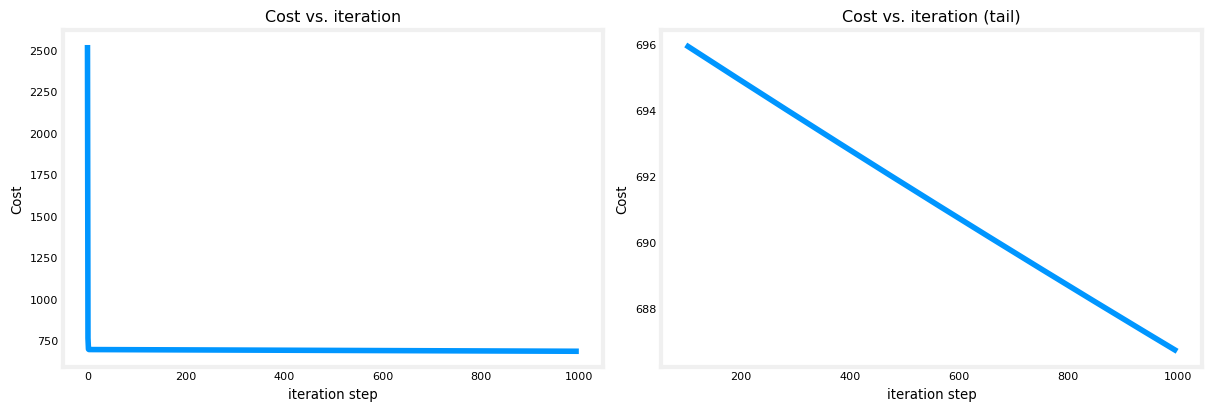

In [21]:
# plot cost vs iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title('Cost vs. iteration')
ax2.set_title('Cost vs. iteration (tail)')
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()